In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows",None)
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [25]:
df.columns


Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [26]:
faltantes = (df.isnull().sum() / len(df["Classes  "])) * 100
faltantes

day            0.000000
month          0.406504
year           0.406504
Temperature    0.406504
 RH            0.406504
 Ws            0.406504
Rain           0.406504
FFMC           0.406504
DMC            0.406504
DC             0.406504
ISI            0.406504
BUI            0.406504
FWI            0.406504
Classes        0.813008
dtype: float64

### Creating a column called Region because the dataset is divided in two regions

In [27]:
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [28]:
df[["Region"]] = df[["Region"]].astype(int)
print(df["Region"].dtypes)
df =df.dropna().reset_index(drop=True)
faltantes = (df.isnull().sum() / len(df["Region"])) * 100
print(faltantes)

int64
day            0.0
month          0.0
year           0.0
Temperature    0.0
 RH            0.0
 Ws            0.0
Rain           0.0
FFMC           0.0
DMC            0.0
DC             0.0
ISI            0.0
BUI            0.0
FWI            0.0
Classes        0.0
Region         0.0
dtype: float64


### Droping the line 122 

In [29]:
df.iloc[[122]]
df = df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


### Droping all empty spaces in the columns names

In [30]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Adjusting the data types

In [31]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [32]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [33]:
df.drop(['day','year'],axis=1,inplace=True)

### Encoding the "Classes" column

In [34]:
df['Classes'].unique()
encode = []
for i in df['Classes']:
    if i.strip() == 'not fire':
        encode.append(0)
    else:
        encode.append(1)
df.drop('Classes',axis=1,inplace=True)
df['Classes']=encode

# Seeing the data distribution

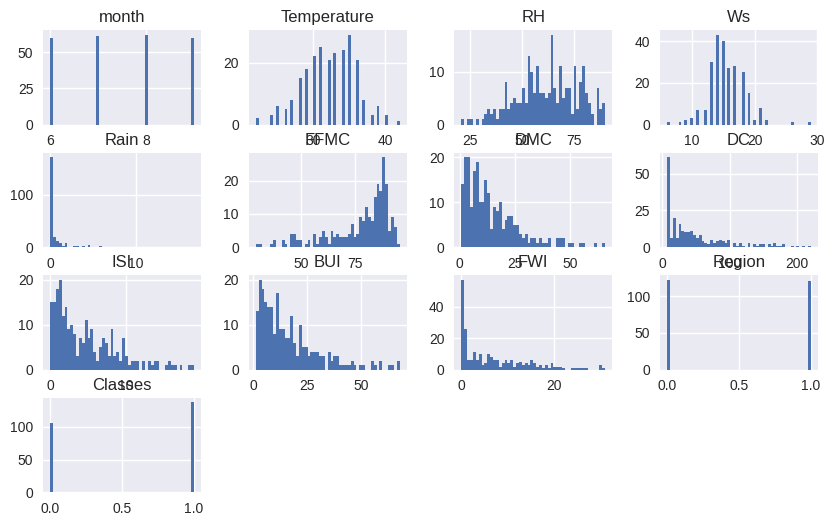

In [37]:
plt.style.use("seaborn-v0_8")
df.hist(bins=50,figsize=(10,6))
plt.show()

In [38]:
percentage=df['Classes'].value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

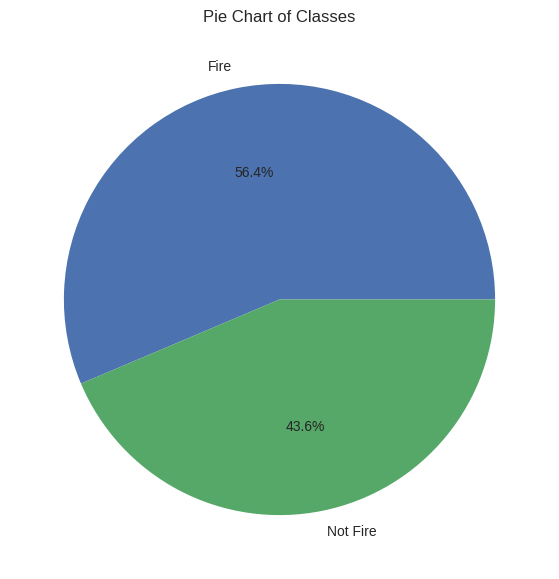

In [39]:
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Pie Chart of Classes')
plt.show()

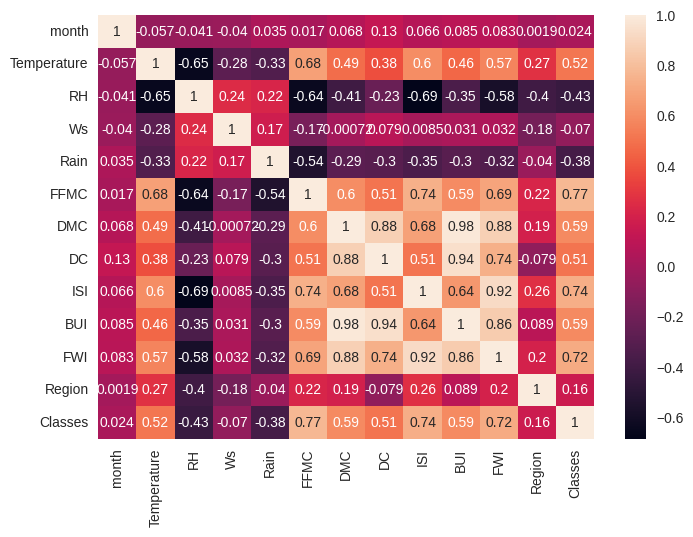

In [41]:
sns.heatmap(df.corr(),annot=True)
plt.show()

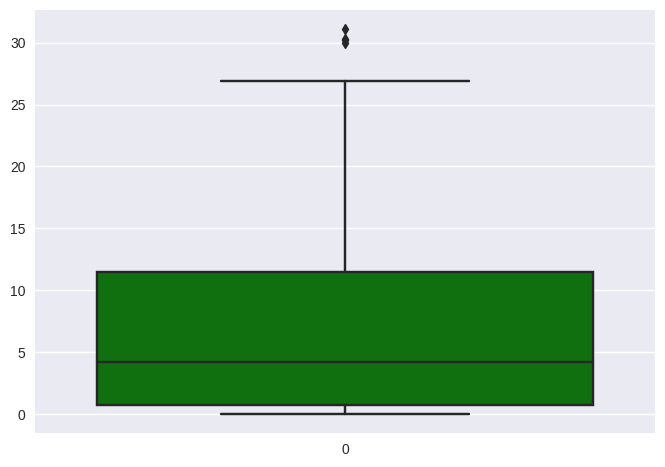

In [42]:
sns.boxplot(df['FWI'],color='green')
plt.show()

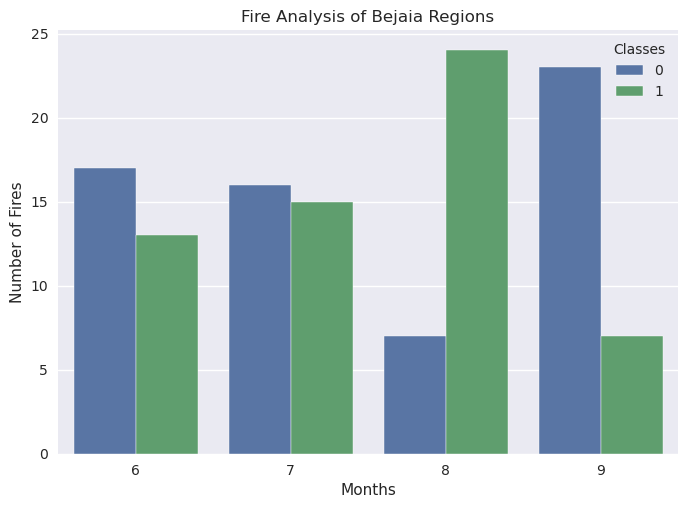

In [43]:
dftemp=df.loc[df['Region']==0]
plt.subplots()
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dftemp)
plt.ylabel('Number of Fires')
plt.xlabel('Months')
plt.title('Fire Analysis of Bejaia Regions')
plt.show()

# Training the Model

In [44]:
y = df['FWI']
X = df.drop("FWI",axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

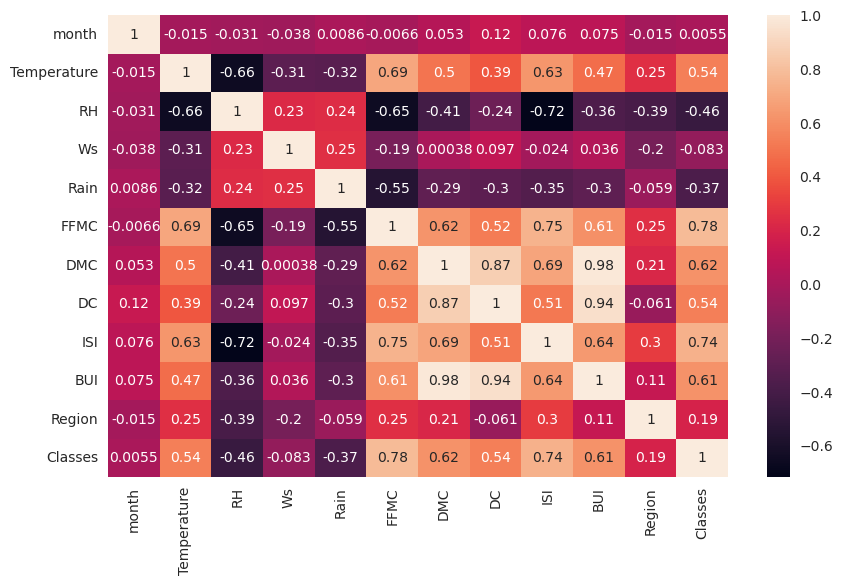

In [45]:
plt.figure(figsize=(10,6))
corr=X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

### Droping DC and BUI wich are very correlated

In [46]:
X_train.drop(['DC','BUI'],axis=1,inplace=True)
X_test.drop(['DC','BUI'],axis=1,inplace=True)

### Normalizing the data

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

### Boxplots to understand effect of standard scaller

/tmp/ipykernel_124/1273572000.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


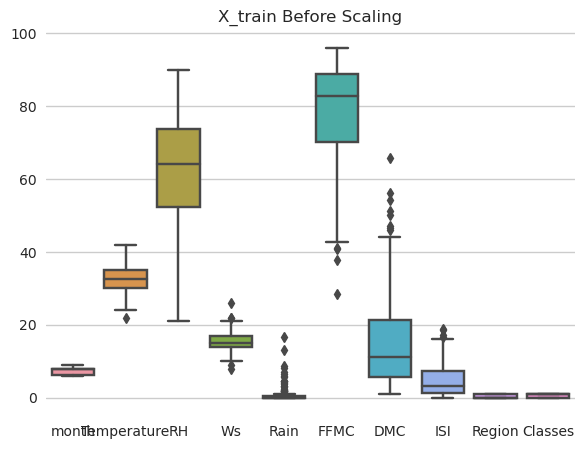

In [49]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.show()

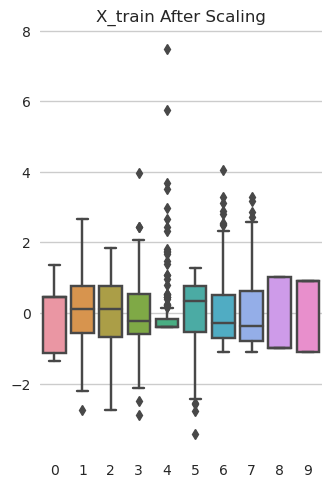

In [50]:
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.show()

# Training the Linear Models

### Linear Regression

In [67]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [62]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
r2_adjusted=1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)
print("r2: ",score)
print("r2_adjusted: ",r2_adjusted)

mse:  0.6958559593199208
mae:  0.5662065166333028
rmse:  0.8341798123425913
r2:  0.9842781874265488
r2_adjusted:  0.9811338249118586


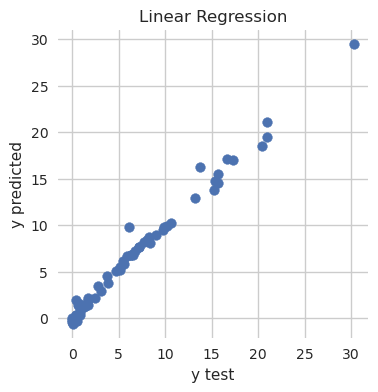

In [63]:
plt.figure(figsize=(4,4))
plt.scatter(y_test,y_pred)
plt.title("Linear Regression")
plt.xlabel("y test")
plt.ylabel("y predicted")
plt.show()

### Lasso Regression

In [64]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
r2_adjusted=1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)
print("r2: ",score)
print("r2_adjusted: ",r2_adjusted)

mse:  2.2483458918974772
mae:  1.133175994914409
rmse:  1.4994485292591664
r2:  0.9492020263112388
r2_adjusted:  0.9390424315734867


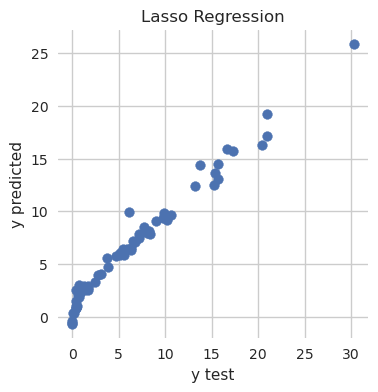

In [66]:
plt.figure(figsize=(4,4))
plt.scatter(y_test,y_pred)
plt.title("Lasso Regression")
plt.xlabel("y test")
plt.ylabel("y predicted")
plt.show()

### Ridge Regression

In [68]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
r2_adjusted=1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)
print("r2: ",score)
print("r2_adjusted: ",r2_adjusted)

mse:  0.7210375407595069
mae:  0.5795459271852433
rmse:  0.8491392940851972
r2:  0.9837092476935569
r2_adjusted:  0.9804510972322683


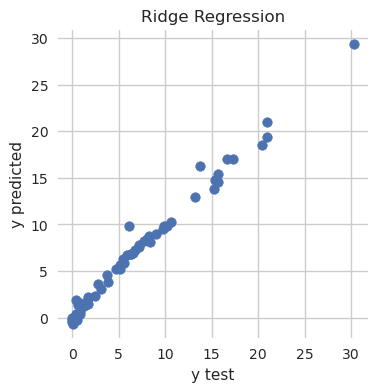

In [69]:
plt.figure(figsize=(4,4))
plt.scatter(y_test,y_pred)
plt.title("Ridge Regression")
plt.xlabel("y test")
plt.ylabel("y predicted")
plt.show()

In [70]:
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred=elasticnet.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
r2_adjusted=1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)
print("r2: ",score)
print("r2_adjusted: ",r2_adjusted)

mse:  5.517250102067473
mae:  1.8822352387195778
rmse:  2.3488827348480967
r2:  0.8753460815219092
r2_adjusted:  0.850415297826291


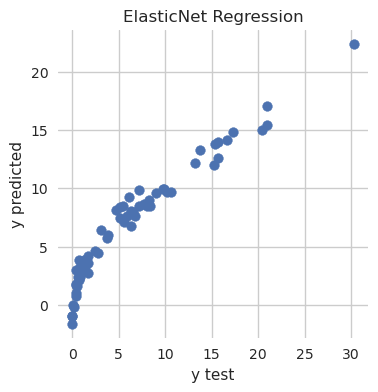

In [71]:
plt.figure(figsize=(4,4))
plt.scatter(y_test,y_pred)
plt.title("ElasticNet Regression")
plt.xlabel("y test")
plt.ylabel("y predicted")
plt.show()

In [ ]:
## Choosing the best model and saving it, as well as its normalizer used in training

In [ ]:
import pickle
pickle.dump(ridge,open('ridge.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))